thetas=array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ])
prior=array([0.000999, 0.000999, 0.000999, ..., 0.000999, 0.000999, 0.000999])
posterior=array([0.00000000e+00, 1.99800200e-06, 3.99600400e-06, ...,
       1.99400599e-03, 1.99600400e-03, 1.99800200e-03])


Text(0, 0.5, '$p(\\theta)$')

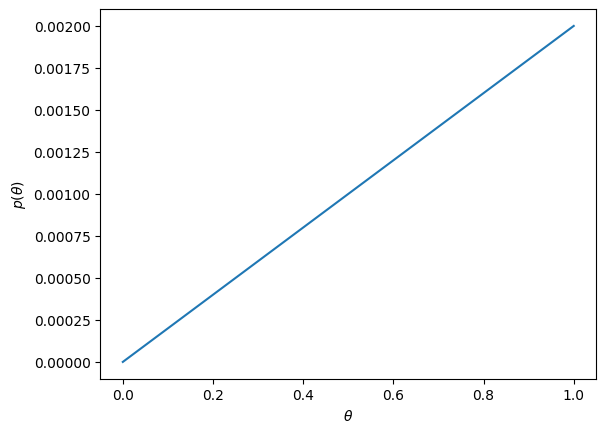

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 本来は連続値だが扱いづらいので、細かく刻んだ離散値を使ってベルヌーイ分布のパラメータ候補を定義
thetas = np.linspace(0, 1, 1001)
print(f"{thetas=}")

likelihood_func = lambda r: thetas if r else 1 - thetas


def calc_posterior(r: int, prior: np.ndarray) -> np.ndarray:
    lp = likelihood_func(r) * prior  # 尤度関数と事前分布の積
    return lp / lp.sum()  # 確率分布の定義を満たすために、Σθp(r|θ)p(θ)で割って正規化


# 事前分布(i.e. 最初に我々が持つ信念) p(theta) を一様分布として初期化(まだ何も前提知識がないので)
prior = np.array([1.0 / len(thetas) for _ in thetas])
print(f"{prior=}")

# 1回の試行後(クリックが観測された場合)の事後分布を計算して、事前分布を更新
posterior = calc_posterior(1, prior)
print(f"{posterior=}")

plt.plot(thetas, posterior)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta)$")


Text(0.5, 1.0, '$p(\\theta|Data)$ after 40 trials')

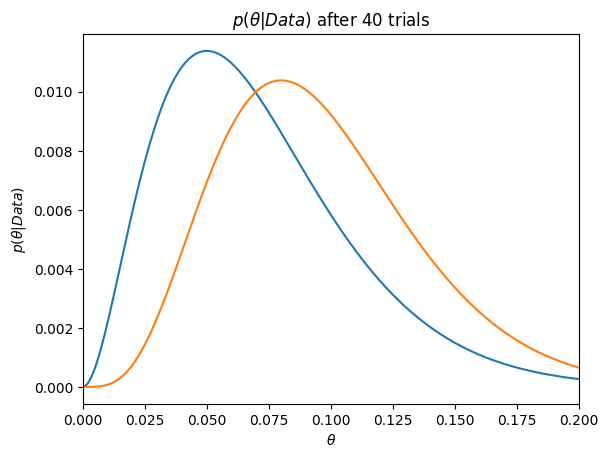

In [ ]:
# 40回の試行後の事後分布を計算
rewards_A = [1] * 2 + [0] * 38
rewards_B = [1] * 4 + [0] * 46

# 信念 \hat{p}(theta) の初期値(事前分布)を、一様分布として初期化
p_theta_A = np.array([1.0 / len(thetas) for _ in thetas])
p_theta_B = np.array([1.0 / len(thetas) for _ in thetas])

for r_A in rewards_A:
    # 観測結果に基づいて得られる事後分布によって、信念 \hat{p}(theta) を更新していく
    p_theta_A = calc_posterior(r_A, p_theta_A)

for r_B in rewards_B:
    p_theta_B = calc_posterior(r_B, p_theta_B)


plt.plot(thetas, p_theta_A)
plt.plot(thetas, p_theta_B)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta|Data)$")
plt.xlim(0.0, 0.2)
plt.title(r"$p(\theta|Data)$ after 40 trials")

Text(0.5, 1.0, '$p(\\theta|Data)$ after 40 trials')

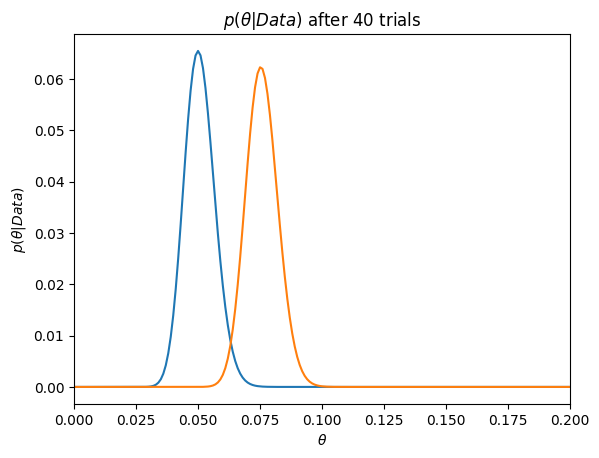

In [14]:
# 1500回くらいの試行後の事後分布を計算
rewards_A = [1] * 64 + [0] * 1216
rewards_B = [1] * 128 + [0] * 1572

# p(theta)の初期値(事前分布)を、一様分布として初期化
p_theta_A = np.array([1.0 / len(thetas) for _ in thetas])
p_theta_B = np.array([1.0 / len(thetas) for _ in thetas])

for r_A in rewards_A:
    p_theta_A = calc_posterior(r_A, p_theta_A)

for r_B in rewards_B:
    p_theta_B = calc_posterior(r_B, p_theta_B)


plt.plot(thetas, p_theta_A)
plt.plot(thetas, p_theta_B)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta|Data)$")
plt.xlim(0.0, 0.2)
plt.title(r"$p(\theta|Data)$ after 40 trials")